# Application 1.5: PC Sound Board Quantizer

Given a system with an ADC, typically one has to know beforehand or conduct measurements to obtain the quantizer step size ∆. This is the case when using a personal computer (PC) sound board. For a sound board, the value of ∆ depends on whether the signal was acquired using the microphone input or the line-in input of the sound board. The microphone interface is designed for signals with a peak value of Xmax = 10 to 100 mV, while the peak for the line-in is typically 0.2 to 2 V. Note that the voltage ranges of line inputs and microphones vary from card to card. For the sake of this discussion, one can assume a dynamic range of [−100, 100] mV and an ADC of 8 bits per sample, such that ∆ ≈ 0.78 mV.

The following example illustrates how to approximately recover the analog signal for visualization purposes. Assume the digital dynamic range is [0, 255], and the digital samples are D = [13, 126, 3, 34, 254]. If one simply uses `stem(D)`, there is no information about time and amplitude.


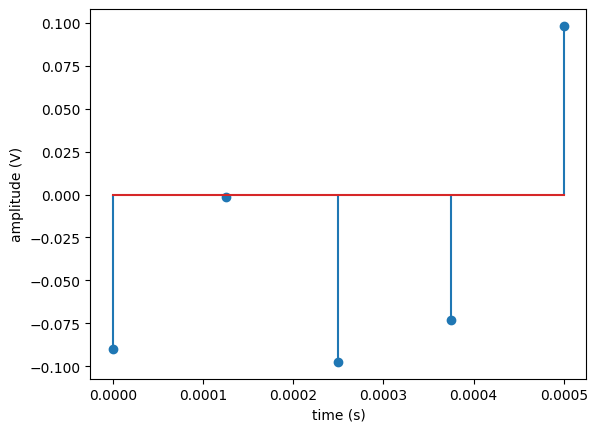

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D = np.array([13, 126, 3, 34, 254])  # Signal as 8-bit unsigned [0, 255]
n = np.arange(5)  # Sampling instants in the digital domain
Fs = 8000  # Sampling frequency
delta = 0.78e-3  # Step size in Volts

A = (D - 128) * delta  # Subtract offset and normalize by delta
Ts = 1 / Fs  # Sampling interval in seconds
time = n * Ts  # Normalize the x-axis (time)
plt.stem(time, A)  # Signal plot
plt.xlabel('time (s)')
plt.ylabel('amplitude (V)')
plt.show()


This plot demonstrates the necessary transformations to visualize the x-axis in seconds and the y-axis in Volts. The signal has been adjusted to achieve this representation. In this case, the normalized values for the signal are A = 1000 * [-89.70, -1.56, -97.50, -73.32, 98.28]. The x-axis represents time in seconds, and the y-axis represents amplitude in Volts, allowing for a clear visualization of the signal's behavior.

Now assume a PC computer with a sound board that uses a 16-bit ADC and supports at its input a dynamic range of −185 to 185 mV. The quantization step should be ∆ ≈ 5.6 µV. It is assumed here that ∆ = 5.6 µV, and the quantizer is uniform from −215 ∆ to (215 − 1)∆. In this case, there are M = 65,536 = 216 levels organized as 32,767 positive levels, 32,768 negative levels, and one level representing zero. The assumed coding scheme is the offset code of the table below, with 32,768 as the offset. Hence, the smallest value −215 ∆ is mapped to the 16-bit codeword "0000 0000 0000 0000," (−215 + 1)∆ to "0000 0000 0000 0001," and so on, with (215 − 1)∆ being coded as "1111 1111 1111 1111."

If at a specific time t0 the ADC input is x(t0) = x = 0.003 V, the ADC output is xi = 536, which corresponds to xq = 0.0030016 V and leads to a quantization error e ≈ -1.6 × 10⁻⁶ V.

$$
\begin{array}{ccccccc}
\text{Binary number} & \text{Unsigned integer} & \text{Two's complement} & \text{Offset} & \text{Sign and magnitude} & \text{Gray code} \\
000 & 0 & 0 & -4 & 0 & 0 & 32,764 \\
001 & 1 & 1 & -3 & 1 & 1 & 32,765 \\
010 & 2 & 2 & -2 & 2 & 3 & 32,766 \\
011 & 3 & 3 & -1 & 3 & 2 & 32,767 \\
100 & 4 & -4 & 0 & \text{``$-0$''} & 7 & 32,768 \\
101 & 5 & -3 & 1 & -1 & 6 & 32,769 \\
110 & 6 & -2 & 2 & -2 & 4 & 32,770 \\
111 & 7 & -1 & 3 & -3 & 5 & 32,771 \\
\end{array}
$$


In [2]:
import math

def ak_quantizer(x, delta, b):
    xq = delta * round(x / delta)
    xi = round(x / delta)
    error = x - xq
    return xq, xi, error

x = 0.003
delta = 5.6e-6
b = 16

xq, xi, error = ak_quantizer(x, delta, b)

# Display the results
print("Quantized value (xq):", xq)
print("Quantization index (xi):", xi)
print("Quantization error (error):", error)


Quantized value (xq): 0.0030015999999999997
Quantization index (xi): 536
Quantization error (error): -1.5999999999996052e-06


In the code cells above, we've implemented a quantization example using Python to demonstrate the quantization process for a 16-bit ADC with a given quantization step size (∆).